<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Every-matrix-can-be-seen-as-a-linear-transformation" data-toc-modified-id="Every-matrix-can-be-seen-as-a-linear-transformation-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Every matrix can be seen as a linear transformation</a></span></li><li><span><a href="#Example-1." data-toc-modified-id="Example-1.-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Example 1.</a></span></li><li><span><a href="#Example-2." data-toc-modified-id="Example-2.-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Example 2.</a></span></li><li><span><a href="#Example-3." data-toc-modified-id="Example-3.-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Example 3.</a></span></li><li><span><a href="#Example-4.-rotation-matrix" data-toc-modified-id="Example-4.-rotation-matrix-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Example 4. rotation matrix</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#The-left-singular-values" data-toc-modified-id="The-left-singular-values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The left-singular values</a></span><ul class="toc-item"><li><span><a href="#Example-5." data-toc-modified-id="Example-5.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example 5.</a></span></li></ul></li><li><span><a href="#The-right-singular-values" data-toc-modified-id="The-right-singular-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The right-singular values</a></span><ul class="toc-item"><li><span><a href="#Example-6." data-toc-modified-id="Example-6.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example 6.</a></span></li></ul></li><li><span><a href="#The-nonzero-singular-values" data-toc-modified-id="The-nonzero-singular-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The nonzero singular values</a></span><ul class="toc-item"><li><span><a href="#Example-7." data-toc-modified-id="Example-7.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Example 7.</a></span></li></ul></li><li><span><a href="#Drawing-a-circle-with-Matplotlib" data-toc-modified-id="Drawing-a-circle-with-Matplotlib-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drawing a circle with Matplotlib</a></span></li><li><span><a href="#Rotation-matrix" data-toc-modified-id="Rotation-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rotation matrix</a></span></li><li><span><a href="#Basis-vectors" data-toc-modified-id="Basis-vectors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Basis vectors</a></span></li><li><span><a href="#Linear-transformation" data-toc-modified-id="Linear-transformation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear transformation</a></span></li><li><span><a href="#SVD" data-toc-modified-id="SVD-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>SVD</a></span></li><li><span><a href="#Numpy" data-toc-modified-id="Numpy-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Numpy</a></span></li><li><span><a href="#Image-processing" data-toc-modified-id="Image-processing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Image processing</a></span></li></ul></div>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [28]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [29]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [30]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 2 on linear algebra from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts. You can check the syllabus in the [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Introduction

The last chapter was a lot of fun! This one will be a bit less heavy. We will see another way to decompose matrices: the Singular Value Decomposition or SVD. Since the beginning of this series, I emphasized the fact that you can see matrices as linear transformation in space. With the SVD, you decompose a matrix in three other matrices. You can see these new matrices as *sub-transformations* of the space. Instead of doing the transformation in one movement, we decompose it in three movements. As a bonus, we will apply the SVD to image processing. We will see the effect of SVD on an image of Lucy the goose (it is just a goose named Lucy...) so keep on reading!

# 2.8 Singular Value Decomposition

<img src="images/unit-circle-transformation1.png" width="400" alt="Plot of the unit circle and its transformation" title="Transformation of the unit circle">
<em>The unit circle and its transformation by a matrix.</em>

We saw in [2.7](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/) that the eigendecomposition can be done only for square matrices. The way to go to decompose other types of matrices that can't be decomposed with eigendecomposition is to use **Singular Value Decomposition** (SVD).

We will decompose $\bs{A}$ into 3 matrices (instead of two with eigendecomposition):

<img src="images/singular-value-decomposition.png" width="300" alt="Illustration of the singular value decomposition" title="The singular value decomposition">
<em>The singular value decomposition</em>

The matrices $\bs{U}$, $\bs{D}$, and $\bs{V}$ have the following properties:

- $\bs{U}$ and $\bs{V}$ are orthogonal matrices ($\bs{U}^\text{T}=\bs{U}^{-1}$ and $\bs{V}^\text{T}=\bs{V}^{-1}$; see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/) for more details about orthogonal matrices)

- $\bs{D}$ is a diagonal matrix (all 0 except the diagonal ; see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)). However $\bs{D}$ is not necessarily square.

The columns of $\bs{U}$ are called the left-singular vectors of $\bs{A}$ while the columns of $\bs{V}$ are the right-singular vectors of $\bs{A}$. The values along the diagonal of $\bs{D}$ are the singular values of $\bs{A}$.

Here are the dimensions of the factorization:

<img src="images/singular-value-decomposition-understanding-dimensions.png" width="300" alt="Dimensions of the singular value decomposition (SVD)" title="The dimensions of the singular value decomposition (SVD)">
<em>The dimensions of the singular value decomposition</em>


The diagonal matrix of singular values is not square but have the shape of $\bs{A}$. Look at the example provided in the [Numpy doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to see that they create a matrix of zeros with the same shape as $\bs{A}$ and fill it with the singular values:

```python
smat = np.zeros((9, 6), dtype=complex)
smat[:6, :6] = np.diag(s)
```

# Intuition

I think that the intuition behind the singular value decomposition needs some explanations about the idea of matrix transformation. For that reason, here are several examples showing how the space can be transformed by 2D square matrices. Hopefully, this will lead to a better understanding of this statement: $\bs{A}$ is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices $\bs{U}$, $\bs{D}$, and $\bs{V}$.

<span class='pquote'>
    $\bs{A}$ is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices $\bs{U}$, $\bs{D}$, and $\bs{V}$.
</span>

You can look at [this animation](https://en.wikipedia.org/wiki/Singular-value_decomposition) from the Wikipedia article on the SVD. If you scroll down the page you will see each step.

### Every matrix can be seen as a linear transformation

You can see a matrix as a specific linear transformation. When you *apply* this matrix to a vector or to another matrix you will apply this linear transformation to it.

### Example 1.

We will modify the vector:

$$
\bs{v}=\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}
$$

by applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

We will have:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x + 0y\\\\
    0x + 2y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

We see that applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

just doubled each coordinate of our vector. Here are the graphical representation of $\bs{v}$ and its transformation $\bs{w}$:

<img src="images/transformation-vector-by-matrix.png" width="400" alt="Plot of a vector and its transformation" title="The matrix increased both coordinates of the vector">
<em>Applying the matrix on the vector multiplied each coordinate by two</em>

You can look at other examples of simple transformations on vectors and unit circle in [this video](https://www.youtube.com/watch?v=kJIUbtSowRg).


### Example 2.

To represent the linear transformation associated with matrices we can also draw the unit circle and see how a matrix can transform it (see the BONUS in [2.7](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/)). The unit circle represents the coordinates of every unit vectors (vector of length 1, see [2.6](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/)).

<img src="images/unit-circle.png" width="200" alt="Representation of the unit circle" title="The unit circle">
<em>The unit circle</em>

It is then possible to apply a matrix to all these unit vectors to see the kind of deformation it will produce.

Again, let's apply the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

<img src="images/unit-circle-transformation.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>Another representation of the effect of the matrix: each coordinate of the unit circle was multiplied by two</em>

We can see that the matrix doubled the size of the circle. But in some transformations, the change applied to the $x$ coordinate is different from the change applied to the $y$ coordinate. Let's see what it means graphically.

### Example 3.

We will apply the matrix:

$$
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}\cdot
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
$$

This gives the following new circle:

<img src="images/unit-circle-transformation1.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>This time the matrix didn't rescale each coordinate with the same weight</em>

We can check that with the equations associated with this matrix transformation. Let's say that the coordinates of the new circle (after transformation) are $x'$ and $y'$. The relation between the old coordinates ($x$, $y$) and the new coordinates ($x'$, $y'$) is:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
\Leftrightarrow
\begin{cases}
x=\frac{x'}{3}\\\\
y=\frac{y'}{2}
\end{cases}
$$

We also know that the equation of the unit circle is $x^2+y^2=1$ (the norm of the unit vectors is 1, see [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/)). By replacement we end up with:

$$
\begin{align*}
\left(\frac{x'}{3}\right)^2 + \left(\frac{y'}{2}\right)^2 = 1\\\\
\left(\frac{y'}{2}\right)^2 = 1 - \left(\frac{x'}{3}\right)^2\\\\
\frac{y'}{2} = \sqrt{1 - \left(\frac{x'}{3}\right)^2}\\\\
y' = 2\sqrt{1 - \left(\frac{x'}{3}\right)^2}
\end{align*}
$$

We can check that this equation corresponds to our transformed circle. Let's start by drawing the old circle. Its equation is:

$$
\begin{align*}
x^2+y^2=1\\\\
y^2=1-x^2\\\\
y=\sqrt{1-x^2}
\end{align*}
$$

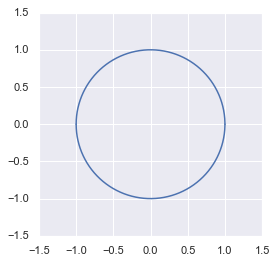

In [31]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

So far so good!

*Coding tip*: You can see the trick to plot a circle here: you create the $x$ variable, then $y$ is defined from $x$. This means that for each $x$, the corresponding $y$ value is calculated (and thus $y$ has the same shape as $x$). Since the result of the square root can be negative or positive (for instance, 4 can be the result of $2^2$ but also of $(-2)^2$) we need to plot both solutions ($y$ and $-y$ in `plt.plot`). Note also that a lot of values are needed if we want the connection between the two demi-spheres. See also some discussion [here](https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle).


Now let's add the circle obtained after matrix transformation. We saw that it is defined with

$$
y = 2\sqrt{1 - \left(\frac{x}{3}\right)^2}
$$

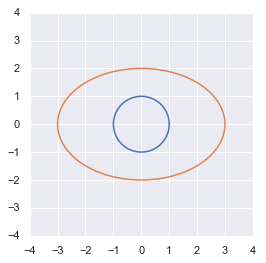

In [32]:
x1 = np.linspace(-3, 3, 100000)
y1 = 2*np.sqrt(1-((x1/3)**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

This shows that our transformation was correct.

Note that these examples used **diagonal matrices** (all zeros except the diagonal). The general rule is that the transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**. This is a first element to understand the SVD. Look again at the decomposition

<img src="images/singular-value-decomposition.png" width="300">

<span class='pquote'>
    The transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**
</span>

We saw that the matrix $\bs{D}$ is a diagonal matrix. And we saw also that it corresponds to a rescaling without rotation.

### Example 4. rotation matrix

Matrices that are not diagonal can produce a rotation (see more details [here](https://en.wikipedia.org/wiki/Rotation_matrix)). Since it is easier to think about angles when we talk about rotation, we will use a matrix of the form

$$
R=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
$$

This matrix will rotate our vectors or matrices counterclockwise through an angle $\theta$. Our new coordinates will be

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    xcos(\theta) - ysin(\theta)\\\\
    xsin(\theta) + ycos(\theta)
\end{bmatrix}
$$

Let's rotate some vectors through an angle of $\theta = 45^\circ$.

Let's start with the vector $\bs{u}$ of coordinates $x=0$ and $y=1$ and the vector $\bs{v}$ of coordinates $x=1$ and $y=0$. The vectors $\bs{u'}$ $\bs{v'}$ are the rotated vectors.

<img src="images/unit-vectors-rotation.png" width="200" alt="Rotation of the unit vectors through matrix operation" title="Rotation of the unit vectors">
<em>Counter clockwise rotation of the unit vectors with $\theta = 45^\circ$</em>

First, let's plot $\bs{u}$ and $\bs{v}$.

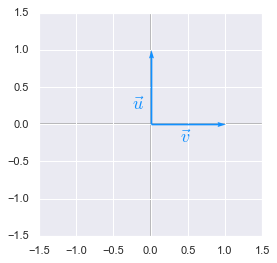

In [33]:
orange = '#FF9A13'
blue = '#1190FF'
    
u = [1,0]
v = [0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.2, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.show()

They are the <a href="https://en.wikipedia.org/wiki/Basis_(linear_algebra)">basis vectors</a> of our space. We will calculate the transformation of these vectors:

$$
\begin{cases}
u_x = 0\cdot cos(45) - 1\cdot sin(45)\\\\
u_y = 0\cdot sin(45) + 1\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
u_x = -sin(45)\\\\
u_y = cos(45)
\end{cases}
$$

$$
\begin{cases}
v_x = 1\cdot cos(45) - 0\cdot sin(45)\\\\
v_y = 1\cdot sin(45) + 0\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
v_x = cos(45)\\\\
v_y = sin(45)
\end{cases}
$$

We will now plot these new vectors to check that they are well our basis vectors rotated through an angle of $45^\circ$.

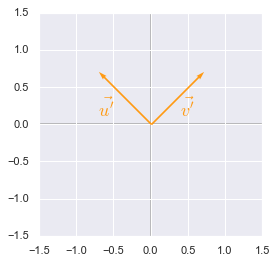

In [34]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[orange, orange])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=orange, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=orange, size=18)
plt.show()

*Coding tip:* the numpy functions `sin` and `cos` take input in radians. We can convert our angle from degrees to radians with the function `np.radians()`.

We can also transform a circle. We will take a rescaled circle (the one from the example 3.) to be able to see the effect of the rotation.

<img src="images/rescaled-circle-rotated.png" width="300" alt="A rescaled circle (not the same hight and width) rotated" title="Rescaled circle rotated">
<em>The effect of a rotation matrix on a rescaled circle</em>

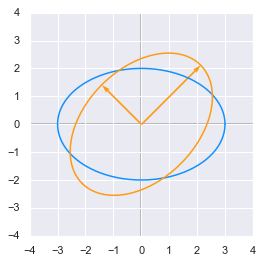

In [35]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plotVectors([u1, v1], cols=['#FF9A13', '#FF9A13'])

plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We can see that the circle has been rotated by an angle of $45^\circ$. We have chosen the length of the vectors from the rescaling weight from example 3 (factor 3 and 2) to match the circle.

### Summary

I hope that you got how vectors and matrices can be transformed by rotating or scaling matrices. The SVD can be seen as the decomposition of one complex transformation in 3 simpler transformations (a rotation, a scaling and another rotation).

Note that we took only square matrices. The SVD can be done even with non square matrices but it is harder to represent transformation associated with non square matrices. For instance, a 3 by 2 matrix will map a 2D space to a 3D space.

<img src="images/non-square-matrix-change-dimensions.png" width="250" alt="A non square matrix change the number of dimensions of the input" title="Example of a change of dimensions">
<em>A non square matrix change the number of dimensions of the input</em>

# The three transformations

Now that the link between matrices and linear transformation is clearer we can check that a transformation associated with a matrix can be decomposed with the help of the SVD.

But first let's create a function that takes a 2D matrix as an input and draw the unit circle transformation when we apply this matrix to it. It will be useful to visualize the transformations.

In [36]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    
    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    
    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

We can use it to check that the three transformations given by the SVD are equivalent to the transformation done with the original matrix. We will also draw each step of the SVD to see the independant effect of the first rotation, the scaling and the second rotation.

We will use the matrix:

$$
\bs{A}=\begin{bmatrix}
    3 & 7\\\\
    5 & 2
\end{bmatrix}
$$

and plot the unit circle and its transformation by $\bs{A}$:

In [37]:
A = np.array([[3, 7], [5, 2]])

print 'Unit circle:'
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'Unit circle transformed by A:'
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-37-02fb34d80674>, line 3)

This is what we get when we apply the matrix $\bs{A}$ to the unit circle and the basis vectors. We can see that the two base vectors are not necessarily rotated the same way. This is related to the sign of the determinant of the matrix (see [2.11](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.11-The-determinant/)).

Let's now compute the SVD of $\bs{A}$:

In [38]:
U, D, V = np.linalg.svd(A)
U

NameError: name 'A' is not defined

In [ ]:
D

In [ ]:
V

We can now look at the sub-transformations by looking at the effect of the matrices $\bs{U}$, $\bs{D}$ and $\bs{V}$ in the reverse order. Note that it returns the right singular vector **already transposed** (see the [doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)).

In [39]:
# Unit circle
print 'Unit circle:'
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'First rotation:'
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print 'Scaling:'
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print 'Second rotation:'
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-39-42854f1d4111>, line 2)

Just to be sure, you can compare this last step with the transformation by $\bs{A}$. Fortunately, you will see that the result is the same:

In [40]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

NameError: name 'A' is not defined

# Singular values interpretation

The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector ($u_1$) and its norm will be the first singular value ($\sigma_1$).

In [41]:
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

plotVectors([u1, v1], cols=['black', 'black'])

matrixToPlot(A)

plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

NameError: name 'D' is not defined

They are the major ($\sigma_1u_1$) and minor ($\sigma_2u_2$) axes of the elipse. We can see that the feature corresponding to this major axis is associated with more variance (the range of value on this axis is bigger than the other). See [2.12](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/) for more details about the variance explained.

# SVD and eigendecomposition

Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.

The matrices $\bs{U}$, $\bs{D}$ and $\bs{V}$ can be found by transforming $\bs{A}$ in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix $\bs{A}$ by its transpose in one way or the other:

- $\bs{U}$ corresponds to the eigenvectors of $\bs{AA}^\text{T}$
- $\bs{V}$ corresponds to the eigenvectors of $\bs{A^\text{T}A}$
- $\bs{D}$ corresponds to the eigenvalues $\bs{AA}^\text{T}$ or $\bs{A^\text{T}A}$ which are the same.

Let's take an example of a non square matrix:

$$
\bs{A}=\begin{bmatrix}
    7 & 2\\\\
    3 & 4\\\\
    5 & 3
\end{bmatrix}
$$

The singular value decomposition can be done with the `linalg.svd()` function from Numpy (note that `np.linalg.eig(A)` works only on square matrices and will give an error for `A`).

In [42]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [43]:
D

array([10.25142677,  2.62835484])

In [44]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

## The left-singular values

The left-singular values of $\bs{A}$ correspond to the eigenvectors of $\bs{AA}^\text{T}$.

### Example 5.

Note that the sign difference comes from the fact that eigenvectors are not unique. The `linalg` functions from Numpy return the normalized eigenvectors. Scaling by `-1` doesn't change their direction or the fact that they are unit vectors.

In [45]:
U, D, V = np.linalg.svd(A)

Left singular vectors of A:

In [46]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

Eigenvectors of AA_transpose:

In [47]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

## The right-singular values

The right-singular values of $\bs{A}$ correspond to the eigenvectors of $\bs{A}^\text{T}\bs{A}$.

### Example 6.

In [48]:
U, D, V = np.linalg.svd(A)

Right singular vectors of A:

In [49]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

Eigenvectors of A_transposeA:

In [50]:
np.linalg.eig(A.T.dot(A))[1]

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

## The nonzero singular values

The nonzero singular values of $\bs{A}$ are the square roots of the eigenvalues of $\bs{A}^\text{T}\bs{A}$ and $\bs{AA}^\text{T}$.

### Example 7.

In [51]:
U, D, V = np.linalg.svd(A)
D

array([10.25142677,  2.62835484])

Eigenvalues of A_transposeA:

In [52]:
np.linalg.eig(A.T.dot(A))[0]

array([105.09175083,   6.90824917])

Eigenvalues of AA_transpose:

In [53]:
np.linalg.eig(A.dot(A.T))[0]

array([105.09175083,   6.90824917,   0.        ])

Square root of the eigenvalues:

In [54]:
np.sqrt(np.linalg.eig(A.T.dot(A))[0])

array([10.25142677,  2.62835484])

# BONUS: Apply the SVD on images

In this example, we will use the SVD to extract the more important features from the image. It is nice to see the effect of the SVD on something very visual. The code is inspired/taken from [this blog post](https://www.frankcleary.com/svdimage/).

Let's start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

In [55]:
from PIL import Image

plt.style.use('classic')
img = Image.open('test_svd.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test_svd.jpg'

We will see how to test the effect of SVD on **Lucy the goose**! Let's start to extract the left singular vectors, the singular values and the right singular vectors:

In [56]:
U, D, V = np.linalg.svd(imgmat)

NameError: name 'imgmat' is not defined

Let's check the shapes of our matrices:

In [57]:
imgmat.shape

NameError: name 'imgmat' is not defined

In [ ]:
U.shape

In [ ]:
D.shape

In [ ]:
V.shape

Remember that $\bs{D}$ are the singular values that need to be put into a diagonal matrix. Also, $\bs{V}$ doesn't need to be transposed (see above).

The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

We can reconstruct an image from a certain number of singular values. For instance for 2 singular values we will have:

<img src="images/dimensions-reconstruction-image-singular-value-decomposition.png" width="400" alt="The dimensions of singular value decomposition to reconstruct image from few components" title="Image reconstruction dimensions">
<em>We can reconstruct the image from few components</em>

In this example, we have reconstructed the 669px by 1000px image from two singular values. 

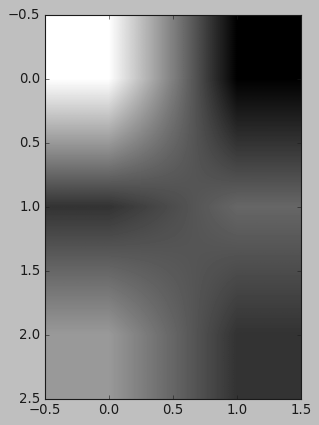

In [58]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

It is hard to see Lucy with only two singular values and singular vectors. But we already see something!

We will now draw the reconstruction using different number of singular values.

In [59]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

ValueError: shapes (3,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

Whaou! Even with 50 components, the quality of the image is not bad!

# Conclusion

I like this chapter on the SVD because it uses what we have learned so far in a concrete application. The next chapter on the pseudo-inverse is quite cool as well so keep on reading! We will see how to find a near-solution of a system of equation that minimizes the error and at the end we will see an example that uses the pseudo-inverse to find the best fit line of a set of data points.

<span class='notes'>
    Feel free to drop me an email or a comment. The syllabus of this series can be found [in the introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). All the notebooks can be found on [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

# References

## Drawing a circle with Matplotlib

- https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle

## Rotation matrix

- https://en.wikipedia.org/wiki/Rotation_matrix)

## Basis vectors

- https://en.wikipedia.org/wiki/Basis_(linear_algebra)

## Linear transformation

- [Aran Glancy - Linear transformation and matrices](https://www.youtube.com/watch?v=kJIUbtSowRg)

## SVD

- [Singular Value Decomposition - Wikipedia](https://en.wikipedia.org/wiki/Singular-value_decomposition)

- [Professor-svd](https://fr.mathworks.com/company/newsletters/articles/professor-svd.html)

- [Intoli - PCA and SVD](https://intoli.com/blog/pca-and-svd/)

## Numpy

- [Numpy SVD doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)

## Image processing

- [Frank Cleary - SVD of an image](https://www.frankcleary.com/svdimage/)

(0, 10)

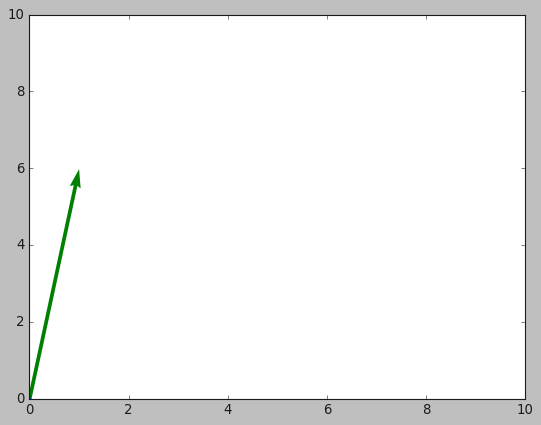

In [60]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [u[2], u[3], v[2],v[3]]
w = [u[0]+v[0], u[1]+v[1], u[2]+v[2], u[3]+v[3]]

plotVectors([u, u_bis, w], ['red', 'green', 'blue'])
plt.xlim(0, 10)
plt.ylim(0, 10)